# Notice

본 notebook은 first-order-motion의 데모를 쉽게 만들고 음성까지 씌울 수 있도록 제작한 노트북입니다.   

-작성자 박결-

#0.준비

In [ ]:
# 1.구글 드라이브 연결
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# % 또는 ! 를 이용하여 리눅스 커널 명령어 실행 가능 
#%pwd 
!pwd
!ls -al /content/gdrive/

In [ ]:
!ls -al 

In [ ]:
!dir

In [ ]:
# 2.실행할 경로로 이동

import os
if os.path.exists('/content/gdrive/My Drive/FOMM') is False:
  os.mkdir('/content/gdrive/My Drive/FOMM')
%cd /content/gdrive/My Drive/FOMM

# 3.소스코드 다운로드
if os.path.exists('/content/gdrive/My Drive/FOMM/first-order-model') is False:
  !git clone https://github.com/AliaksandrSiarohin/first-order-model



In [ ]:
# 4.소스 폴더로 이동
%cd /content/gdrive/My Drive/FOMM/first-order-model
if os.path.exists('my_data') is False:
  os.mkdir('my_data')

global path
path ='my_data'   # 데이터가 있는 폴더

print('정상 실행 완료')

In [ ]:
%pwd

#*파일 올리기

## jpg파일과 mp4파일 총 2개의 파일을 아래 순서대로 진행하세요.
1. https://drive.google.com/file/d/1Yy6EsMypjplXWS0Lp-7qKEKR71doF2KL/view?usp=sharing

1. https://drive.google.com/file/d/1DGiQvkGk6u3pKJRkSc40FPCIsuhPvVU3/view?usp=sharing

1. 사진과 동영상 파일은 __My Drive/FOMM/first-order-model__ 폴더 안에 있는 __'my_data'__에 넣어주세요.  
※입력 데이터(사진과 동영상)의 비율은 1:1이어야 합니다. 사진과 동영상을 편집 툴을 사용해 얼굴 위치를 중심으로 1:1 비율로 잘라주세요.  

2. __'my_data'__에 넣은 파일 이름을 아래 셀의 __image__와 __video__에 적어주세요.
3. 최종 완성한 동영상의 이름을 __result_name__에 적어주세요. 

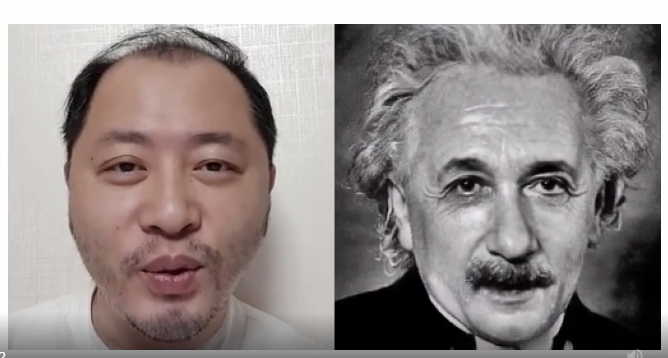

In [17]:
#이미지와 비디오 이름을 적으세요.
image = 'ains.jpg' # 불러올 이미지 이름
video = 'luna.mp4' # 불러올 비디오 이름

#저장할 파일명을 적으세요.
result_name = '최종.mp4' #저장할 파일 이름 



# 1.학습한 체크포인트 불러오기

### 아래 URL에서 __vox-adv-cpk.pth.tar__ 파일을 사본으로 복사하여 first-order-model 폴더에 넣으면 됩니다.
  

https://drive.google.com/drive/folders/1PyQJmkdCsAkOYwUyaj_l-l0as-iLDgeH

또는 

https://drive.google.com/file/d/1r6If7NuxbdC94YfuH_YYXWNfqpzmEeKa/view?usp=sharing

#### 파일은 드라이브에 저장 후 보존됩니다.


In [10]:
from demo import load_checkpoints
#설정파일과 checkpoint파일 경로
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                            checkpoint_path='vox-adv-cpk.pth.tar') #다운받은 checkpoint파일 경로를 지정

#만약 FileNotFoundError가 발생한다면, 본 노트북을 '런타임초기화' 후 다시 시작하세요.

# 2.필요한 라이브러리 불러오기

%whos

In [ ]:
%whos

In [ ]:
import imageio
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")
from demo import make_animation
from skimage import img_as_ubyte

import moviepy.editor as mp
from moviepy.editor import *
!pip install -U kora
from kora.drive import upload_public


In [ ]:
%whos

# 3.웹페이지 화면에 디스플레이할수있는 함수 정의

In [15]:
#화면을 보여줄 디스플레이 함수

def display( driving, source=None, generated=None, fps = None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = []
        if source is not None:
          cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])
    if fps is None:
      ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    else:
      fps = 1000. / fps
      ani = animation.ArtistAnimation(fig, ims, interval=fps, repeat_delay=1000)
    plt.close()
    return ani

# 4.Data 불러오기 

In [18]:
#8-2
#이미지와 비디오 불러오기

image_path = os.path.join(path, image)
video_path = os.path.join(path, video)

source_image = imageio.imread(image_path)
driving_video = imageio.get_reader(video_path)

# 5.동영상 FPS 확인


In [ ]:
fps = driving_video.get_meta_data()['fps']
fps

# 6.prediction

In [20]:
# 전처리
source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

In [21]:
#결과물 생성
predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)

100%|██████████| 302/302 [00:12<00:00, 24.75it/s]


#7.결과물 확인

In [22]:
#함수에 데이터를 넣고 비디오를 만듬.
result_video = display(driving = driving_video, 
                       source = None,    #이미지를 원하지 않을 경우 None 설정
                       generated = predictions,  #prediction 하지 않은 경우 None 설정
                       fps=fps)

In [ ]:
HTML(result_video.to_html5_video())

#8.비디오 저장


In [27]:
result_path = os.path.join('my_data/', result_name)

imageio.mimsave(result_path, [img_as_ubyte(frame) for frame in predictions], fps=fps)
# result_video.save(result_path)

#9.결과물에 음성 씌우기(함수 정의)

In [26]:
# 함수 정의
def make_video(origin, gen, save):
  
  audio_path = os.path.join(path, 'audio.mp3')

  clip = mp.VideoFileClip(origin)
  clip.audio.write_audiofile(audio_path)

  videoclip = VideoFileClip(gen)
  audioclip = AudioFileClip(audio_path)
  new_audioclip = CompositeAudioClip([audioclip])
  videoclip.audio = new_audioclip
  videoclip.write_videofile(save)
  !rm -f {audio_path}

# 10.음성 비디오 저장

In [ ]:
#최종 결과물 이름
save_name = result_name.split('.')[0] +'(with_voice).mp4' 

#음성 비디오 생성과 저장
save_path = os.path.join(path, save_name)
make_video(video_path, result_path, save_path)

#11.최종 결과물 보이기

In [ ]:
url = upload_public(save_path)
# then display it
HTML(f"""<video src={url} height=300 controls/>""")
